# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

   index                                     TITLE  RELEASE_YEAR  SCORE  \
0      0  David Attenborough: A Life on Our Planet          2020    9.0   
1      1                                 Inception          2010    8.8   
2      2                              Forrest Gump          1994    8.8   
3      3                                Anbe Sivam          2003    8.7   
4      4                        Bo Burnham: Inside          2021    8.7   

   NUMBER_OF_VOTES  DURATION   MAIN_GENRE MAIN_PRODUCTION  
0            31180        83  documentary              GB  
1          2268288       148        scifi              GB  
2          1994599       142        drama              US  
3            20595       160       comedy              IN  
4            44074        87       comedy              US  
Mean Squared Error: 40202700833.08836


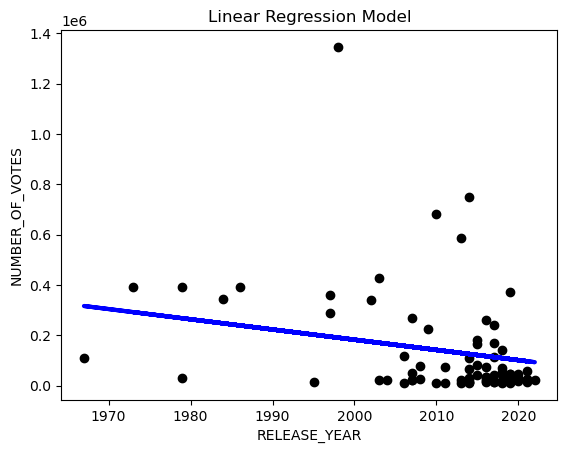

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://www.kaggle.com/datasets/shivamb/netflix-shows"
# Assuming you've downloaded the dataset and saved it as "netflix_shows.csv"
df = pd.read_csv("Netflix titles.csv")

# Explore the dataset
print(df.head())

# For simplicity, let's use a numeric column as a predictor (e.g., 'duration' for the sake of illustration)
# You may choose a relevant column based on your analysis
X = df[['RELEASE_YEAR']] # Feature
y = df['NUMBER_OF_VOTES'] # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the results (optional)
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('RELEASE_YEAR')
plt.ylabel('NUMBER_OF_VOTES')
plt.title('Linear Regression Model')
plt.show()


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

In [ ]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [45]:
X = df['RELEASE_YEAR']
Y = df['SCORE']


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train
Y_train

285    7.1
371    6.9
224    7.4
305    7.1
352    6.9
      ... 
143    7.6
0      9.0
211    7.4
374    6.9
41     8.1
Name: SCORE, Length: 290, dtype: float64

In [49]:
X = df['RELEASE_YEAR']
y = df['SCORE']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SCORE   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.900
Date:                Tue, 17 Oct 2023   Prob (F-statistic):             0.0898
Time:                        02:35:39   Log-Likelihood:                -156.36
No. Observations:                 270   AIC:                             316.7
Df Residuals:                     268   BIC:                             323.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.3104      4.582      3.341      0.001       6.289      24.332
RELEASE_YEAR    -0.0039      0.002     -1.703      0.090      -0.008       0.001
==============================================================================
Omnibus:                       13.973   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.179
Skew:                           0.568   Prob(JB):                     0.000506
Kurtosis:                       2.761   Cond. No.                     3.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Error Terms

Finally, plot your error terms!

In [50]:
Y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the Y_train data and predicted Y_data
res = (Y_train - Y_train_pred)

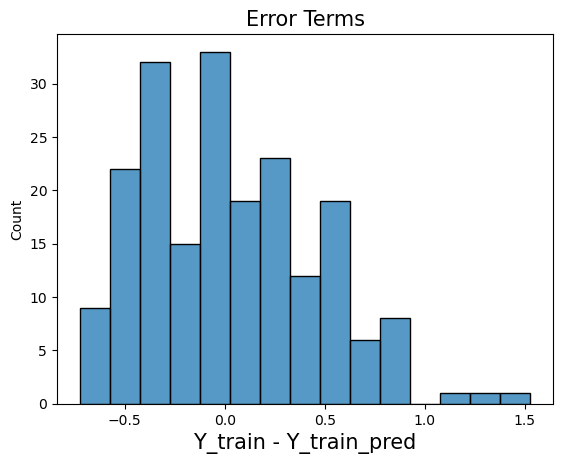

In [51]:
fig = plt.figure()
sns.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('Y_train - Y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.011
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not really